<a href="https://colab.research.google.com/github/LeonimerMelo/python/blob/main/Linear_Regression_on_the_Diabetes_Dataset_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
import pandas as pd

In [ ]:
data = load_diabetes()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data['target']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

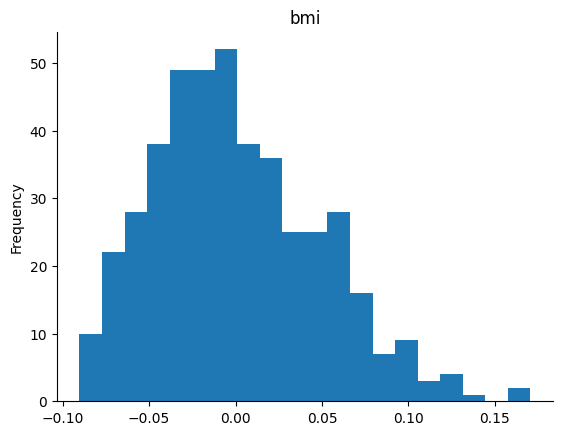

In [ ]:
# @title Histogram of bmi - body mass index

df['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

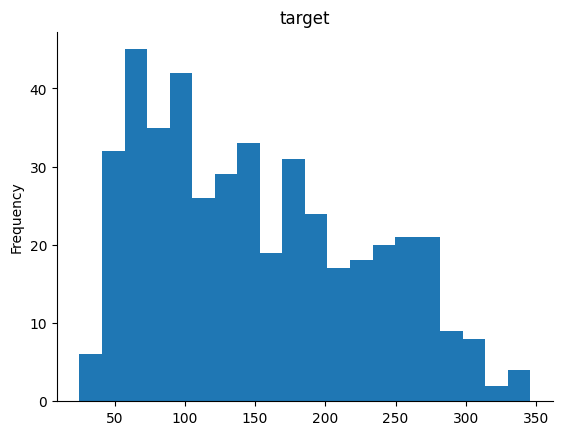

In [ ]:
# @title Histogram of target

df['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Load X, y diabetes dataset
diabetes_X, diabetes_y = (data.data, data.target)

In [ ]:
diabetes_X.shape

(442, 10)

In [ ]:
diabetes_y.shape

(442,)

In [ ]:
print(diabetes_X.max())

0.19878798965729408


In [ ]:
print(diabetes_X.min())

-0.13776722569000302


In [ ]:
# Use only one feature (bmi columm)
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [ ]:
diabetes_X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [ ]:
df['bmi'][0:6]

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
5,-0.040696


In [ ]:
# another way to select bmi columm into np array
X_df=np.array(df['bmi'])

numpy.reshape(a, newshape, order='C')

In [ ]:
X_df=np.reshape(X_df,(-1,1))

In [ ]:
X_df[0:6]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594]])

In [ ]:
X_df.shape

(442, 1)

In [ ]:
diabetes_X.shape

(442, 1)

In [ ]:
diabetes_X[0:6]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594]])

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [ ]:
diabetes_X_train.shape

(422, 1)

In [ ]:
diabetes_X_test.shape

(20, 1)

In [ ]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
diabetes_y_train.shape

(422,)

In [ ]:
diabetes_y_test.shape

(20,)

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train);

In [ ]:
# The coefficients y = a0 + a1x
print("Linear regression coefficient [a1]: ", regr.coef_)
print("Intercept of the Y axis [a0]: ", regr.intercept_)

Linear regression coefficient [a1]:  [938.23786125]
Intercept of the Y axis [a0]:  152.91886182616113


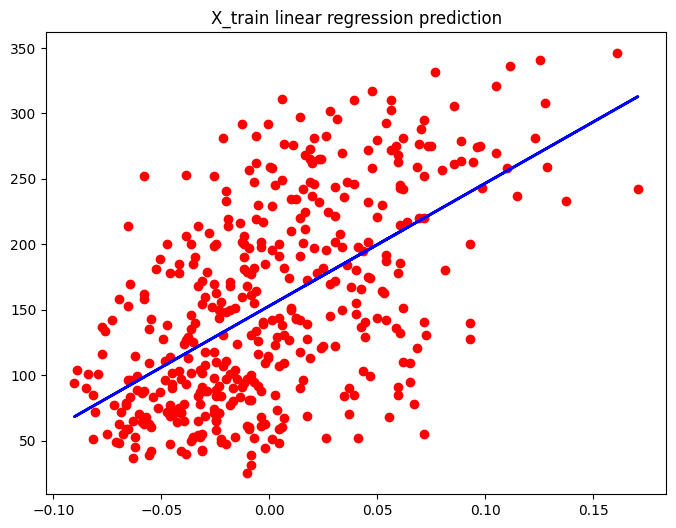

In [ ]:
# plotting X_train data sete with linear regression prediction
fig = plt.figure(figsize=(8,6))
plt.scatter(diabetes_X_train, diabetes_y_train, color="red")
plt.plot(diabetes_X_train, regr.predict(diabetes_X_train), color="blue", linewidth=2)
plt.title('X_train linear regression prediction')
plt.show()

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2548.07


In [ ]:
result = pd.DataFrame({'Actual': diabetes_y_test, 'Predict' : diabetes_y_pred})
result

,Actual,Predict
0,233.0,225.973240
1,91.0,115.747634
2,111.0,163.276106
3,152.0,114.736390
4,120.0,120.803854
5,67.0,158.219886
6,310.0,236.085681
7,94.0,121.815098
8,183.0,99.567728
9,66.0,123.837587


### R2 score
The **R2 score** is a very important metric that is used to evaluate the performance of a **regression-based machine learning model**. It is pronounced as R squared and is also known as the **coefficient of determination**. It works by measuring the amount of variance in the predictions explained by the dataset. R2 score = 1 is perfect prediction.

In [ ]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of determination: 0.47


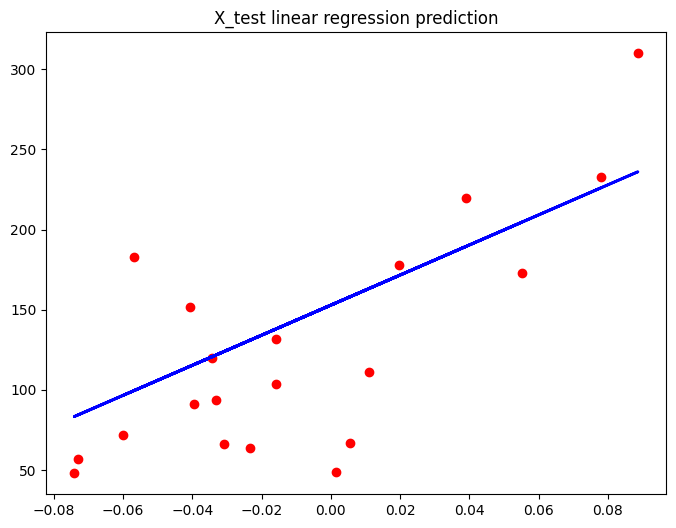

In [ ]:
# Plot outputs
fig = plt.figure(figsize=(8,6))
plt.scatter(diabetes_X_test, diabetes_y_test, color="red")
#plt.scatter(diabetes_X_train, diabetes_y_train, color="blue")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=2)
plt.title('X_test linear regression prediction')
plt.show()

## Exercícios
1. Choose another diabetes dataset columm (regression)
2. Split the data into training (70%) and testing (30%) sets
3. Make linear regression and take scores
4. Compare results with `'bmi'` columm regression

#Referências

[1] https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html


[2] https://medium.com/analytics-vidhya/introduction-to-linear-regression-sklearn-diabetes-dataset-f63378b0a1ee

[3] https://www.kaggle.com/code/meet3010/linear-regression-on-the-diabetes-dataset

[4] https://www.realcode4you.com/post/linear-regression-with-the-diabetes-dataset-using-python-machine-learning